In [4]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt

### Task #1: Merge 12 months of sales data into a single file

In [5]:
files = [file for file in os.listdir('./sales_data')]

all_months_df = pd.DataFrame()

for file in files:
    df = pd.read_csv(f'./sales_data/{file}')
    all_months_df = pd.concat([all_months_df, df])
    
all_months_df.to_csv("all_data.csv", index=False)


### Read merged dataframe

In [6]:
all_data_df = pd.read_csv("all_data.csv")

### Augment data with additional columns

### Clean up data

### Drop NaN rows

In [7]:
all_data_df = all_data_df.dropna(how='all')

### Find 'Or' and delete it

In [8]:
all_data_df = all_data_df[all_data_df['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct type

In [9]:
all_data_df['Quantity Ordered'] = pd.to_numeric(all_data_df['Quantity Ordered'])
all_data_df['Price Each'] = pd.to_numeric(all_data_df['Price Each'])

### Task #2: Add month column

In [10]:
all_data_df['Month'] = all_data_df['Order Date'].str[0:2]
all_data_df['Month'] = all_data_df['Month'].astype('int32')

### Task #3: Add a total column

In [11]:
all_data_df['Total'] = all_data_df['Quantity Ordered'] * all_data_df['Price Each']

### Task #4: Add a city column

In [12]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data_df['City'] = all_data_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

### Question #1: What was the best month for sales? How much was earned that month?

In [13]:
results = all_data_df.groupby('Month').sum()

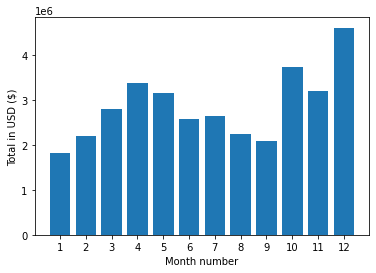

In [14]:
months = range(1, 13)

plt.bar(months, results['Total'])
plt.xticks(months)
plt.ylabel('Total in USD ($)')
plt.xlabel('Month number')
plt.show()


### Question #2: What city had the highest number of sales?

In [15]:
results = all_data_df.groupby('City').sum()

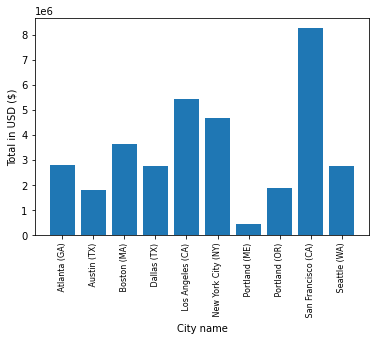

In [29]:
cities = [city for city, df in all_data_df.groupby('City')]

plt.bar(cities, results['Total'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Total in USD ($)')
plt.xlabel('City name')
plt.show()


### Question #3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [22]:
all_data_df['Order Date'] = pd.to_datetime(all_data_df['Order Date'])

In [27]:
all_data_df['Hour'] = all_data_df['Order Date'].dt.hour

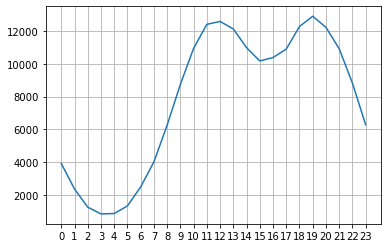

In [35]:
keys = [pair for pair, df in all_data_df.groupby(['Hour'])]

plt.plot(keys, all_data_df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()
